In [58]:
import numpy as np

In [59]:
import matplotlib.pyplot as plt

In [60]:
import katdal as kd

In [61]:
#read block
d = kd.open('/idia/projects/hi_im/SCI-20230907-MS-01/1708710691/1708710691/1708710691_sdp_l0.full.rdb')

In [62]:
#print data header
print(d)

Name: 1708710691_sdp_l0 (version 4.0)
-------------------------------------------------------------------------------
URL: file:///idia/projects/hi_im/SCI-20230907-MS-01/1708710691/1708710691/1708710691_sdp_l0.full.rdb
Observer: Mario Santos  Experiment ID: 20240223-0004
Description: 'UHF HI intensity mapping box 1 rising  no.X offset=0'
Observed from 2024-02-23 19:54:07.397 SAST to 2024-02-23 22:12:04.632 SAST
Dump rate / period: 0.50077 Hz / 1.997 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m000,m001,m002,m003,m004,m005,m006,m007,m008,m009,m010,m011,m012,m013,m014,m015,m016,m017,m018,m019,m020,m021,m022,m023,m024,m025,m026,m027,m029,m030,m031,m032,m033,m034,m035,m036,m037,m038,m039,m040,m041,m042,m043,m044,m045,m046,m047,m048,m049,m050,m051,m052,m053,m054,m055,m056,m057,m058,m059,m060,m061,m062,m063  126      252
Spectral Windows: 1
  ID Band Product  CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0 UHF  c544M4k     816.000       

In [63]:
#number of dishes for this block
print(len(d.ants))

63


In [64]:
d.select()
print(np.shape(d))  #time dump, frequency channel, polarisations. Each dime dump is 2 sec.

(4145, 4096, 252)


In [65]:
#select scan data
d.select(corrprods='auto', scans='scan', strict=True)

In [66]:
freqs = d.freqs
timestamps=d.timestamps

In [67]:
print(np.shape(d))
print(np.shape(timestamps))
print(np.shape(d.az))  #time, dish azimuth
print(np.shape(d.el))  #time, dish elevation

(2884, 4096, 252)
(2884,)
(2884, 63)
(2884, 63)


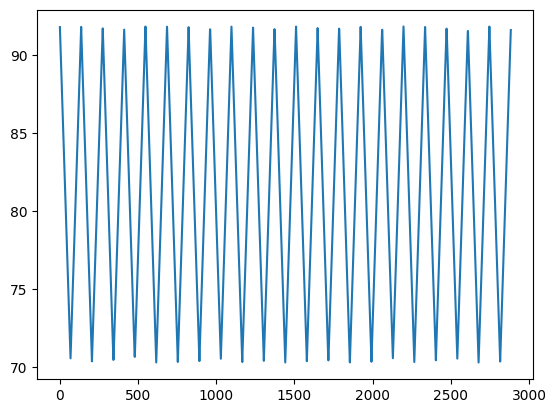

In [68]:
#check azimuth for dish 0
plt.plot(d.az[:,0])

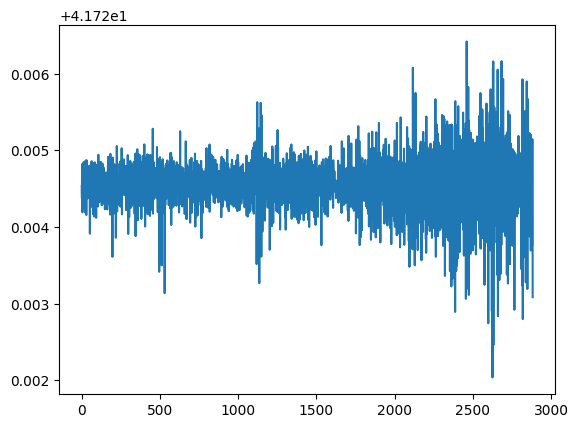

In [69]:
#check elevation for dish 0
plt.plot(d.el[:,0])

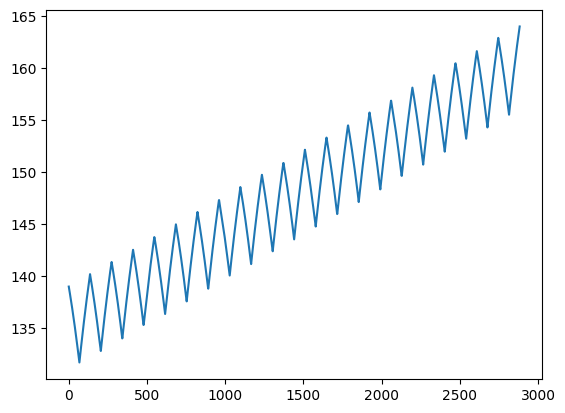

In [70]:
#ra for dish 0 (degrees)
plt.plot(d.ra[:,0])

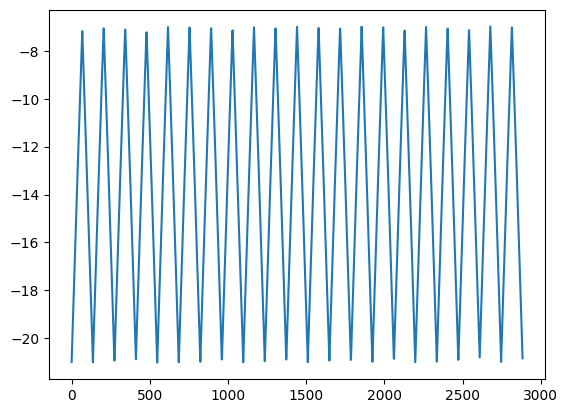

In [71]:
#declination for dish 0 (degrees)
plt.plot(d.dec[:,0])

In [72]:
np.savez('block_coordinates', time=timestamps, el=d.el[:,0], az=d.az[:,0], ra=d.ra[:,0], dec=d.dec[:,0])

In [73]:
coordinates = np.load('block_coordinates.npz')

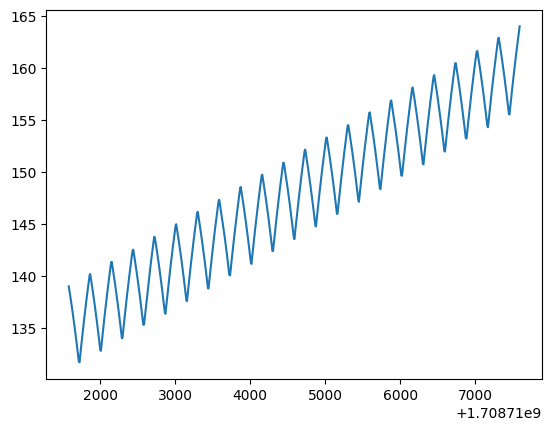

In [74]:
plt.plot(coordinates['time'],coordinates['ra'])